# **Bioinformatics Project - Computational Drug Discovery [Part 5] Comparing Regressors**

Chanin Nantasenamat

['Data Professor' YouTube channel](http://youtube.com/dataprofessor)

In this Jupyter notebook, we will be building a real-life data science project that you can include in your data science portfolio. Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In Part 5, we will be comparing several ML algorithms for build regression models of acetylcholinesterase inhibitors.



## **1. Import libraries**

In [1]:
! pip install lazypredict

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


## **2. Load the data set**


In [3]:
! wget https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2024-12-23 18:57:50--  https://raw.githubusercontent.com/VictoriaLiendro/drug-analysis-tutorial/refs/heads/main/data/erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155232 (152K) [text/plain]
Saving to: ‘erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

erbB1_06_bioactivit 100%[===================>] 151.59K  --.-KB/s    in 0.004s  

2024-12-23 18:57:50 (39.3 MB/s) - ‘erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [155232/155232]



In [4]:
df = pd.read_csv('erbB1_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [5]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [6]:
# Examine X dimension
X.shape

(81, 881)

In [7]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)
X.shape

(81, 150)

In [8]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [10]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:07<00:00,  5.64it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000081 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 102
[LightGBM] [Info] Start training from score 5.642240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

100%|██████████| 42/42 [00:06<00:00,  6.25it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 306
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 102
[LightGBM] [Info] Start training from score 5.642240
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [11]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,53653389514555943717035283121794225281985925310...,-7409277599629154001861273859893346746945243907...,53028162493555067356004439031808.00,0.08
KernelRidge,7.16,-7.51,5.68,0.02
QuantileRegressor,1.80,-0.11,2.05,0.04
DummyRegressor,1.72,0.00,1.95,0.04
LassoLars,1.72,0.00,1.95,0.03
Lasso,1.72,0.00,1.95,0.02
LarsCV,1.57,0.21,1.73,0.29
ElasticNet,1.54,0.26,1.68,0.03
OrthogonalMatchingPursuitCV,1.36,0.50,1.38,0.03


In [12]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,21426839389091634380067902367201638180350477400...,-1794497798836424348410863189631411429896646219...,686524035626669455025919837395970460584247296.00,0.08
KernelRidge,3.00,-15.72,6.63,0.02
GaussianProcessRegressor,2.50,-11.54,5.74,0.03
MLPRegressor,1.23,-0.96,2.27,0.25
TransformedTargetRegressor,1.22,-0.82,2.19,0.02
LinearRegression,1.22,-0.82,2.19,0.11
PassiveAggressiveRegressor,1.16,-0.36,1.89,0.02
QuantileRegressor,1.15,-0.24,1.80,0.03
AdaBoostRegressor,1.14,-0.19,1.77,0.08


## **5. Data visualization of model performance**

[(0.0, 1.0)]

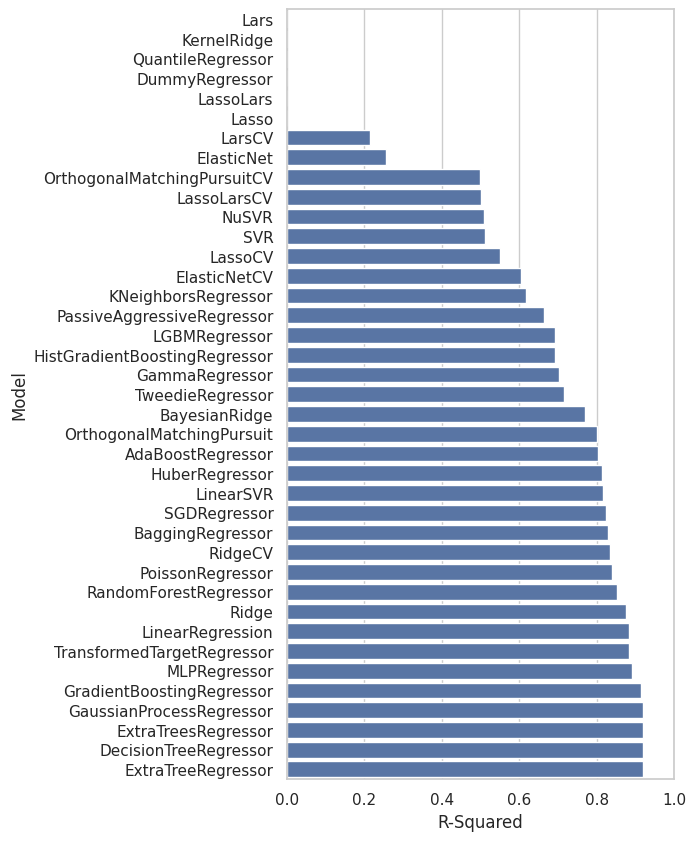

In [13]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

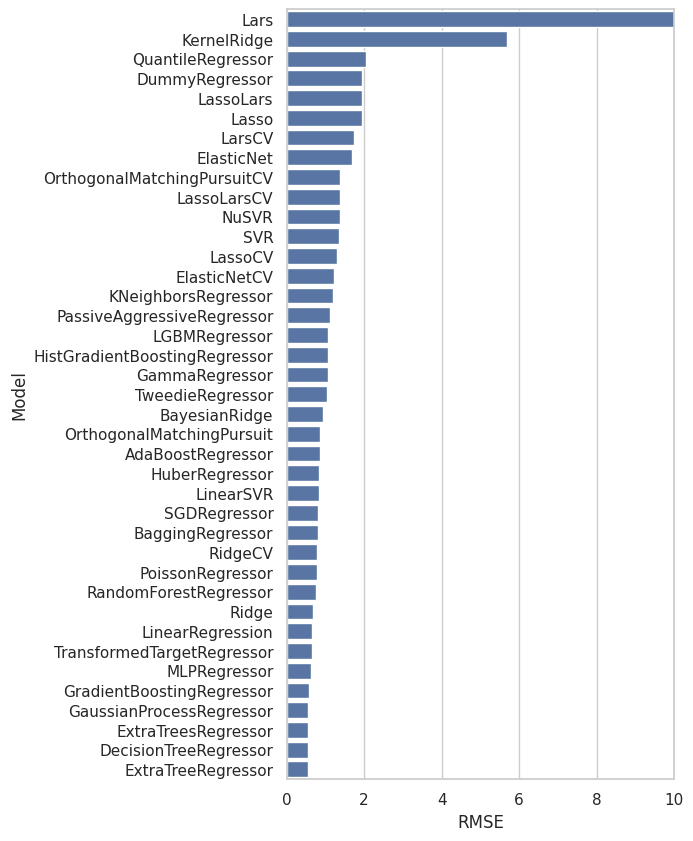

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

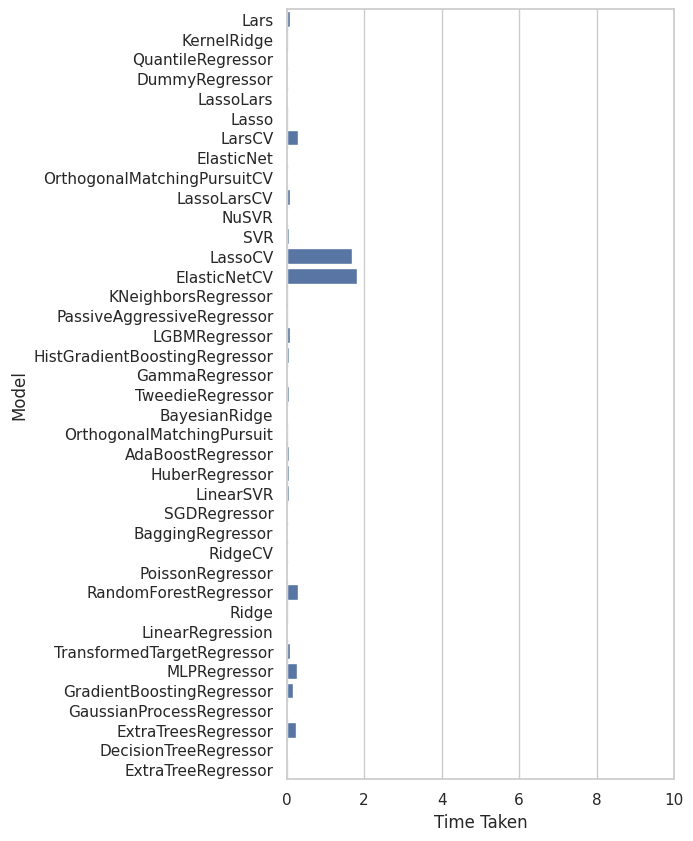

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))